## The most Nobel of Prizes
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
nobel = pd.read_csv("nobel.csv")
nobel.head(n = 4)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland


## 2. So, who gets the Nobel Prize?
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [4]:
# Display the number of (possibly shared) Nobel Prizes handed.
display(len(nobel))

# Display the number of prizes won by male and female recipients.
display(nobel['sex'].value_counts())

# Display the number of prizes won by the top 10 nationalities.
nobel['birth_country'].value_counts().head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

## 3. USA dominance
<p>the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>

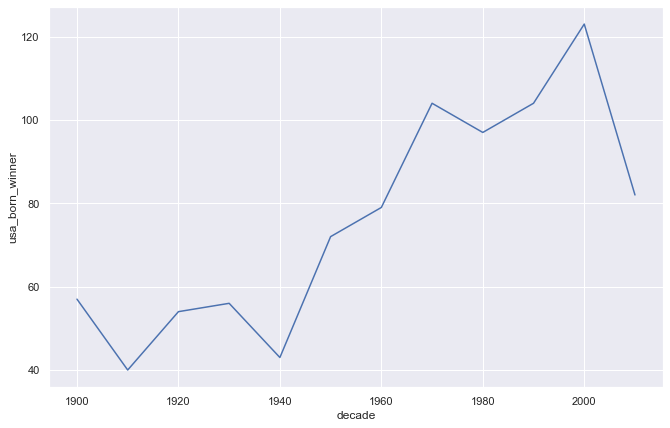

In [5]:
import matplotlib as plt
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year']/10)*10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].count()
#print(prop_usa_winners)
prop_usa_winners

# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x = 'decade', y = 'usa_born_winner', data = prop_usa_winners)


## 5. What is the gender of a typical Nobel Prize winner?
<p>Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

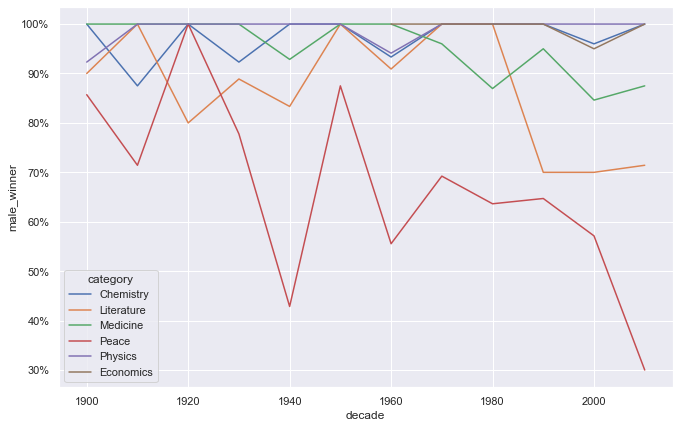

In [29]:
from matplotlib.ticker import PercentFormatter
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex']=='Female'
nobel['male_winner'] = nobel['sex']=='Male'
prop_female_winners = nobel.groupby(['decade','category'],as_index=False)['female_winner'].mean()
prop_male_winners = nobel.groupby(['decade','category'],as_index=False)['male_winner'].mean()
#prop_female_winners
prop_female_winners
# Plotting USA born winners with % winners on the y-axis
ax = sns.lineplot(x = 'decade', y = 'male_winner', hue='category',data = prop_male_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))